

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/lawglance/lawglance) [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1yrS2Kp-kprYWot_sEu7JeWMIRAei_vov?usp=sharing) [![Loom](https://img.shields.io/badge/Loom-Tutorial-8A2BE2?logo=loom)](https://www.loom.com/share/dcc6b14c653c4618829f46a9aa2ab68c?sid=00d0d3c1-9d4b-4cf7-8684-cdee76718bd5)  [![LangChain](https://img.shields.io/badge/LangChain-Open%20Source-5e9cff?logo=langchain&logoColor=white)](https://python.langchain.com/docs/introduction/) [![Crew AI](https://img.shields.io/badge/Crew%20AI-Multi--Agent%20Workflows-00bda?style=flat-square)](https://www.crewai.com/) [![OpenAI](https://img.shields.io/badge/OpenAI-Generative%20AI-412991?logo=openai&logoColor=white)](https://openai.com/)





# LawGlance: A Showcase for Crew AI in the Legal Domain
**LawGlance** is a free opensource legal AI Assistant

Thie notebook utilises an exemplary application of **Crew AI** in the legal domain, showcasing the power of multi-agent workflows to streamline complex legal research tasks. It combines **Crew AI**, **LangChain**, and **Chroma** to retrieve legal documents, perform web searches, and deliver concise, accurate answers tailored to user queries.

This notebook serves as a practical demonstration of how Crew AI can be applied in the legal field, making it a valuable resource for legal professionals, researchers, and developers exploring AI-driven solutions. Future enhancements include multilingual support, voice interaction, and mobile deployment, demonstrating its scalability and versatility.

With **LawGlance**, discover how Crew AI revolutionizes legal research by enabling precise, efficient, and reliable insights. This project is **open-source** under the **Apache 2.0 License**, inspiring innovation in AI applications for the legal domain.


[![LawGlance](https://img.shields.io/badge/LawGlance-Visit%20Website-008080)](https://lawglance.com) [![License: Apache 2.0](https://img.shields.io/badge/License-Apache%202.0-yellow.svg)](https://opensource.org/license/apache-2-0)























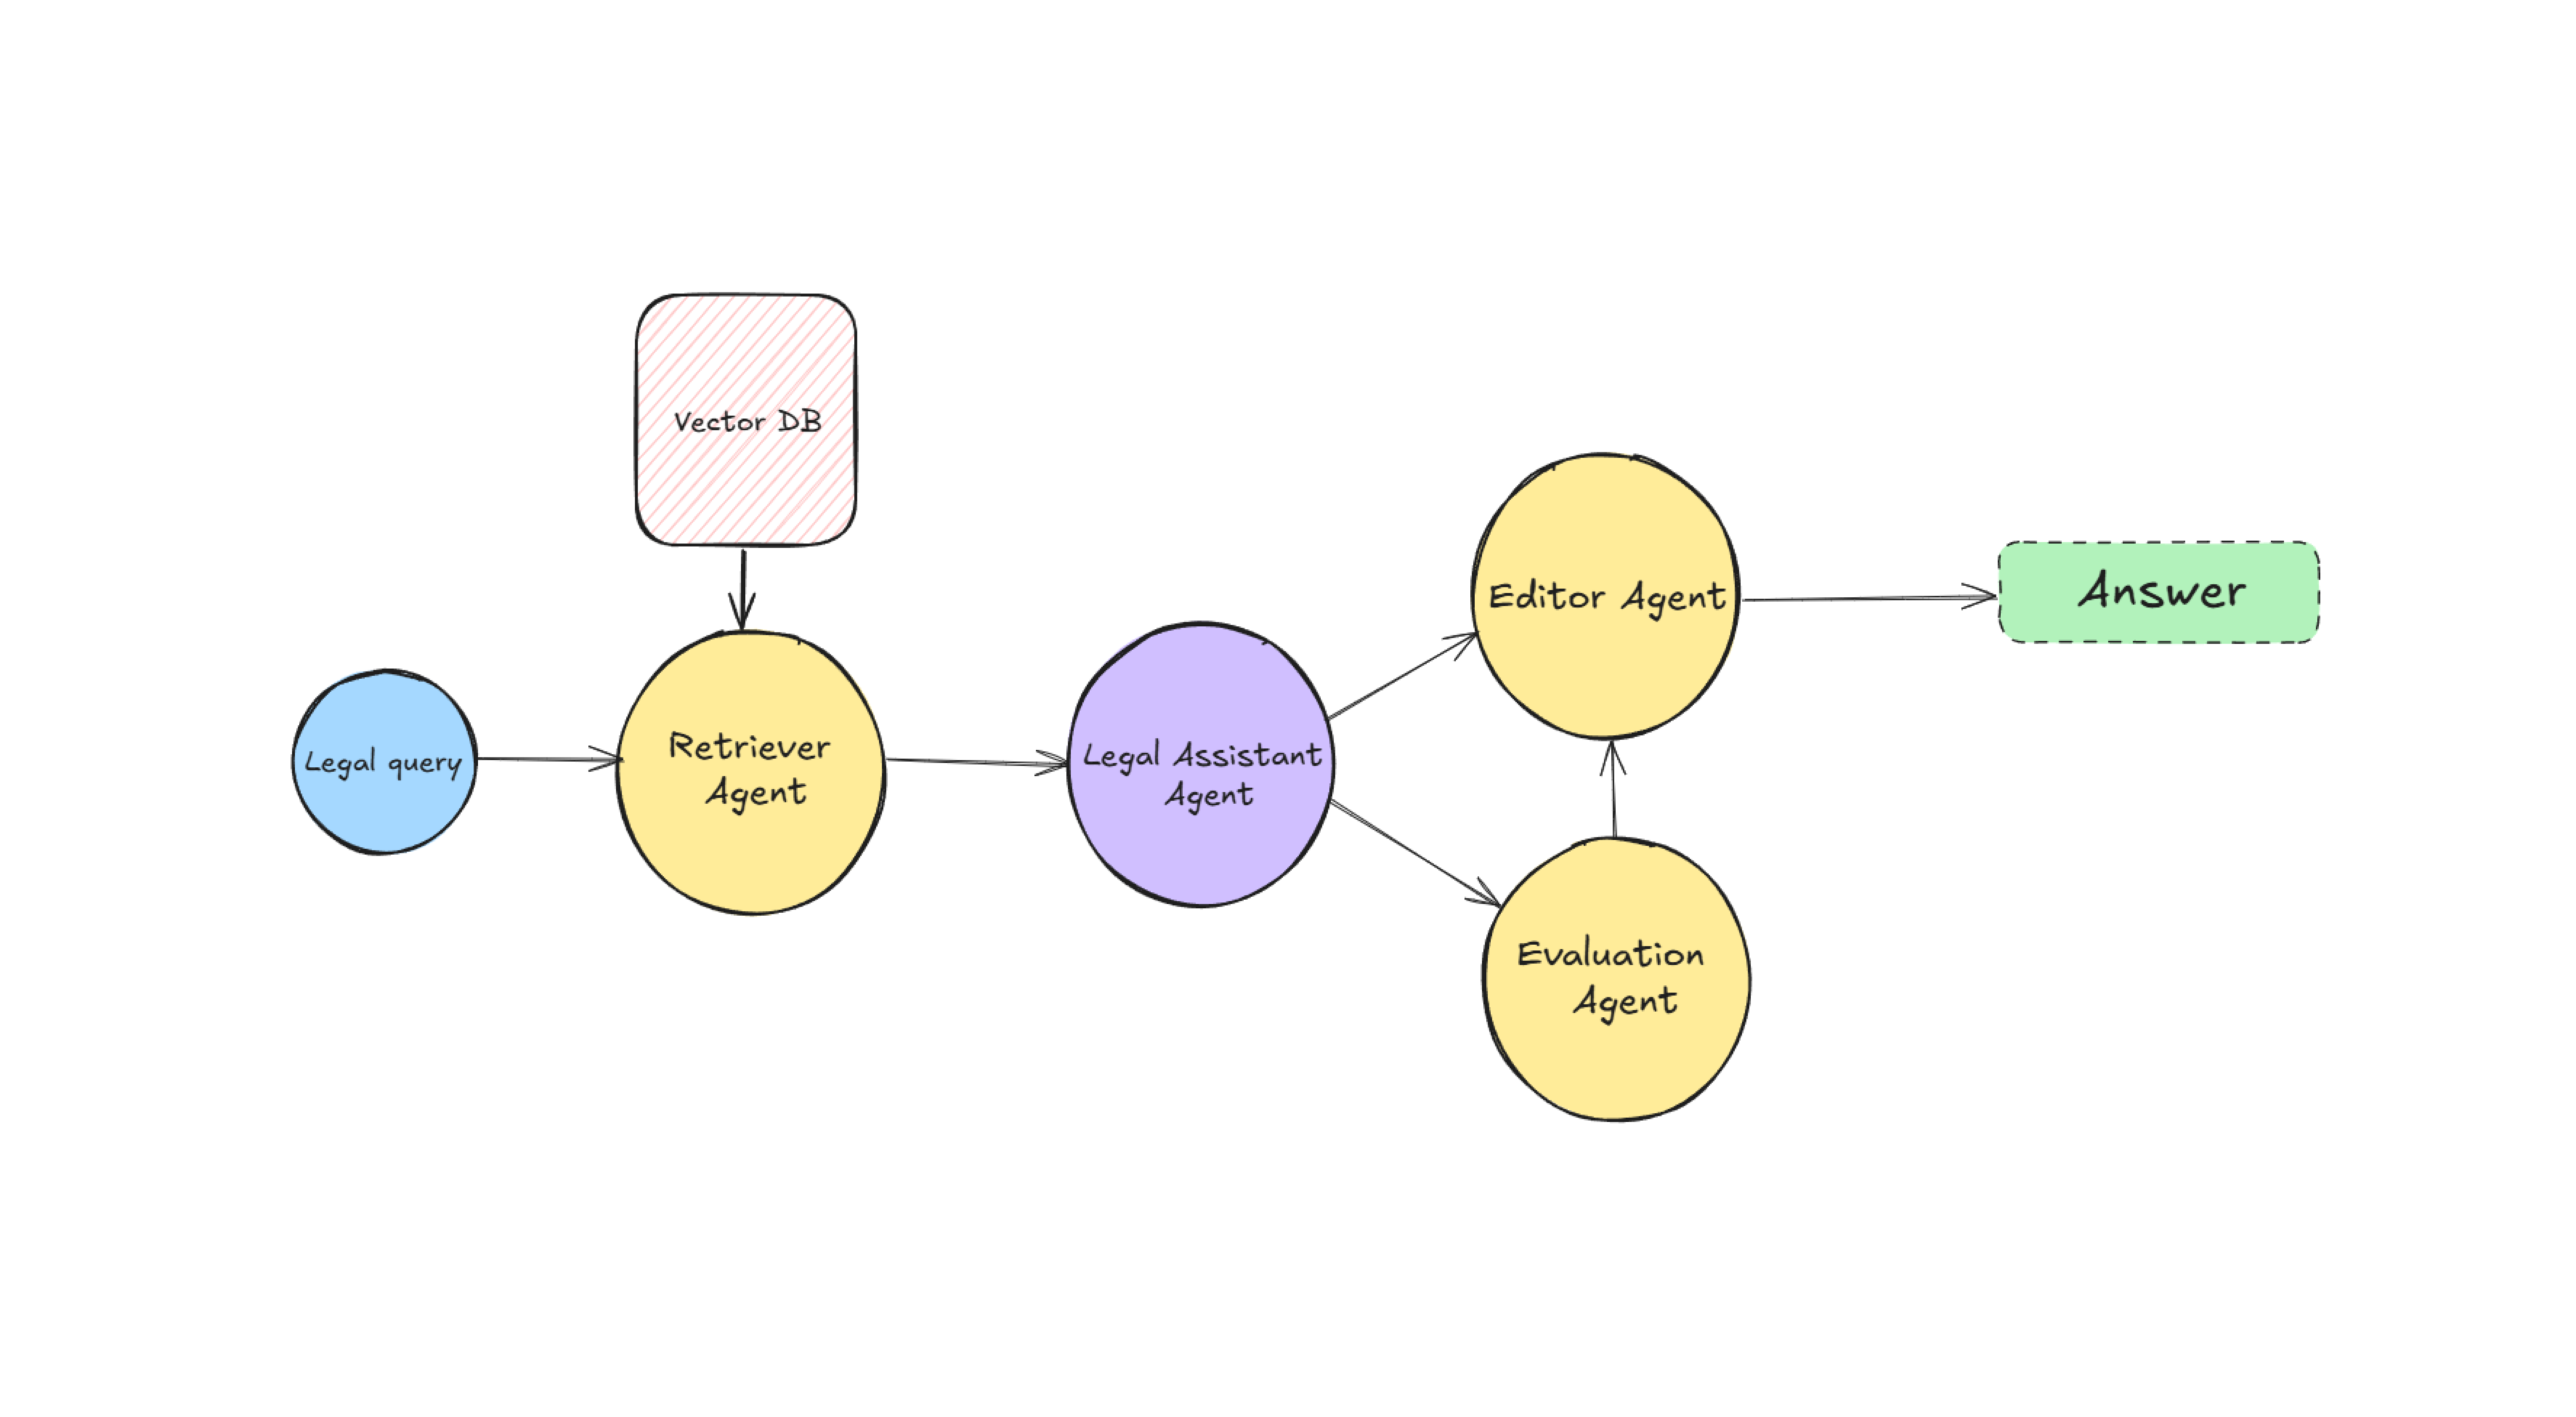

## Installing necessary packages


In [1]:
%%writefile requirements.txt
chroma-hnswlib==0.7.6
chromadb==0.5.11
crewai==0.80.0
crewai-tools==0.14.0
langchain==0.3.7
langchain-chroma==0.1.4
langchain-cohere==0.3.2
langchain-community==0.3.7
langchain-core==0.3.19
langchain-experimental==0.3.3
langchain-groq==0.2.1
langchain-huggingface==0.1.2
langchain-openai==0.2.9
langchain-text-splitters==0.3.2
langchainhub==0.1.20
langcodes==3.4.1
langdetect==1.0.9
langsmith==0.1.144

Writing requirements.txt


In [2]:
! pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of lancedb to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.0/604.0 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.7/197.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.0/463.0 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.2 MB/s eta 0:00:00
 

# Getting Vector db from lawglance github page

In [3]:
!wget https://raw.githubusercontent.com/lawglance/lawglance/main/chroma_db_legal_bot_part1.zip

--2025-01-05 06:50:30--  https://raw.githubusercontent.com/lawglance/lawglance/main/chroma_db_legal_bot_part1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8061900 (7.7M) [application/zip]
Saving to: ‘chroma_db_legal_bot_part1.zip’

chroma_db_legal_bot 100%[===================>]   7.69M  --.-KB/s    in 0.06s   

2025-01-05 06:50:31 (119 MB/s) - ‘chroma_db_legal_bot_part1.zip’ saved [8061900/8061900]



In [4]:
!unzip chroma_db_legal_bot_part1.zip

Archive:  chroma_db_legal_bot_part1.zip
   creating: chroma_db_legal_bot_part1/
   creating: chroma_db_legal_bot_part1/55972a0b-dc22-4056-9b6c-7fae6ca90f6e/
  inflating: chroma_db_legal_bot_part1/55972a0b-dc22-4056-9b6c-7fae6ca90f6e/data_level0.bin  
  inflating: chroma_db_legal_bot_part1/55972a0b-dc22-4056-9b6c-7fae6ca90f6e/header.bin  
  inflating: chroma_db_legal_bot_part1/55972a0b-dc22-4056-9b6c-7fae6ca90f6e/index_metadata.pickle  
  inflating: chroma_db_legal_bot_part1/55972a0b-dc22-4056-9b6c-7fae6ca90f6e/length.bin  
  inflating: chroma_db_legal_bot_part1/55972a0b-dc22-4056-9b6c-7fae6ca90f6e/link_lists.bin  
  inflating: chroma_db_legal_bot_part1/chroma.sqlite3  


# Agentic RAG Using CrewAI & LangChain for Legaldomain

In [5]:
import os
from google.colab import userdata
from crewai import Agent, Task, Crew
from crewai.tools import tool
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings, ChatOpenAI

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_config.py:345: UserWarning: Valid config keys have changed in V2:
* 'fields' has been removed
  warnings.warn(message, UserWarning)


## Basic initialisation of LLM and db's

In [6]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPENAI_API_KEY")
_set_env('TAVILY_API_KEY')

OPENAI_API_KEY: ··········
TAVILY_API_KEY: ··········


In [7]:
api_key=os.environ.get("OPENAI_API_KEY")

llm = ChatOpenAI(model= 'gpt-4o-mini' ,temperature=0.9, openai_api_key=api_key, max_tokens=1200)

embeddings = OpenAIEmbeddings()


vector_store = Chroma(persist_directory="chroma_db_legal_bot_part1", embedding_function=embeddings)

retriever = vector_store.as_retriever(search_type="similarity_score_threshold",search_kwargs={"k": 10, "score_threshold":0.3})

### We are creating a Custom tool for retrieval

In [8]:
@tool("ChromaRetriever")
def chroma_retriever_tool(query : str):
    # Assuming 'retriever' is your Chroma retriever instance
    """Retrieves relevant documents from the Chroma vector store."""
    results = retriever.invoke(query)
    return results

chroma_tool = chroma_retriever_tool

## Custom tool for web search

We are using Tavily web search

In [9]:
from langchain_community.tools import TavilySearchResults
from crewai.tools import BaseTool
from pydantic import Field

search = TavilySearchResults()

class SearchTool(BaseTool):
    name: str = "Search"
    description: str = "Useful for search-based queries. Use this to find current information about latest legal trends and news."
    search: TavilySearchResults = Field(default_factory=TavilySearchResults)

    def _run(self, query: str) -> str:
        """Execute the search query and return results"""
        try:
            return self.search.run(query)
        except Exception as e:
            return f"Error performing search: {str(e)}"
web_search_tool = SearchTool()

## Agents

In [10]:
retriever_agent = Agent(
    role='Retriever Agent',
    goal='Retrieve relevant content about "{query}" from the vector store.',
    backstory=("You are skilled at searching the vector store for user queries and fetching relevant documents."
               "Your ability to find and retrieve relevant content ensures accurate reports."),
    verbose=True,
    memory = True,
    tools=[chroma_tool],
    llm=llm
)

legal_assistant_agent = Agent(
    role="Legal Assistant Agent",
    goal="Generate responses for the {query} based on retrieved documents only",
    backstory=
    "You are a lawyer assistant LawGlance and you answer for legal related queries"
    "You create informative responses using the data provided by the retriever task only"
    "If an informative response can't be provided from the documents you should use websearch tool and respond based on it.",
    verbose=True,
    memory = True,
    allow_delegation=False,
    tools = [web_search_tool],
    llm=llm
)

evaluation_agent = Agent(
    role="Evaluation Expert Agent",
    goal="Verify and evaluate the accuracy and authenticity of responses created by retriever and generator agents.",
    backstory=
    "You are an evaluation expert in the LawGlance ecosystem. "
    "Your primary task is to validate the responses generated by the retriever and generator agents. "
    "You check for accuracy, relevance, and authenticity of the content before it reaches the customer.",
    verbose=True,
    memory=False,
    allow_delegation=False,
    tools = [web_search_tool],
    llm=llm
)

editor_agent = Agent(
    role="Editor Agent",
    goal="Create a concise and edited output for '{query}' based on the generated response.",
    backstory=(
        "You are an Editor tasked with refining the generated responses."
        "You ensure that the final output is concise,to the point, relevant, and properly formatted without any hallucinations."
        "For responses generated using web search, you must include the source of the information."
    ),
    verbose=True,
    memory=False,
    llm=llm
)

## Tasks

In [11]:
retrieval_task = Task(
    description="Retrieve documents related to '{query}' in order to search the vector store."
    "Reframe a standalone question based on the memory.If a standalone question can't be created search the query as it is.",
    expected_output="List of relevant documents.",
    agent = retriever_agent,
)

generation_task = Task(
    description="Generate a response for the {query} based on the retrieved documents only.",
    expected_output="A proper response to the user's query based on the relevant documents only.",
    agent=legal_assistant_agent,
    context=[retrieval_task]
)

evaluation_task = Task(
    description="Verify the accuracy and authenticity of the response generated for the '{query}' based on retrieved documents and validate on basis of stand alone websearch based on response generated.",
    expected_output="A verified and accurate response ready to be shared with the customer, or an error indicating issues with the response and provide with percentage of accuracy",
    agent=evaluation_agent,
    context=[generation_task]
)

editing_task = Task(
    description=(
        "Edit the response generated for '{query}' to ensure conciseness (2-3 sentences), "
        "proper formatting, and source attribution if the response includes web search-based content."
    ),
    expected_output="A concise and edited response that aligns with the query and includes sources where applicable.Ensure it is limited to 2-3 sentences and includes the source for web search-based answers.",
    agent=editor_agent,
    context=[generation_task]
)

## The Crew

In [12]:
# Creatig a crew with the agents and tasks
my_crew = Crew(agents=[retriever_agent,legal_assistant_agent,evaluation_agent,editor_agent], tasks=[retrieval_task,generation_task,evaluation_task,editing_task])

In [13]:
user_query = "What is relevant articles dealing with freedom of speech"
results = my_crew.kickoff(inputs={"query": user_query})
print(f"Raw Output: {results.raw}")

# Agent: Retriever Agent
## Task: Retrieve documents related to 'What is relevant articles dealing with freedom of speech' in order to search the vector store.Reframe a standalone question based on the memory.If a standalone question can't be created search the query as it is.


# Agent: Retriever Agent
## Thought: I need to search for relevant articles related to "freedom of speech" in the vector store. Since I can directly use the query provided, I'll proceed with that.
## Using tool: ChromaRetriever
## Tool Input: 
"{\"query\": \"What is relevant articles dealing with freedom of speech\"}"
## Tool Output: 
[Document(metadata={'country': 'India', 'db_owner': 'LawGlance', 'part': 'PART III', 'part_name': 'Fundamental Rights', 'source': 'https://cdnbbsr.s3waas.gov.in/s380537a945c7aaa788ccfcdf1b99b5d8f/uploads/2024/07/20240716890312078.pdf', 'source_name': 'Indian Constitution'}, page_content='prohibited and any contravention of this provision shall be an offence \npunishable in accorda

In [14]:
print(results.raw)

Articles related to freedom of speech in the Indian Constitution are encapsulated mainly in **Article 19**. **Article 19(1)(a)** guarantees the right to freedom of speech and expression, while **Article 19(2)** outlines reasonable restrictions on this freedom to protect interests such as public order and morality. This dynamic between rights and restrictions is frequently interpreted by the courts, highlighting the balance between individual liberties and societal interests.


In [15]:
import json
print(f"Raw Output: {results.raw}")
if results.json_dict:
    print(f"JSON Output: {json.dumps(results.json_dict, indent=2)}")
if results.pydantic:
    print(f"Pydantic Output: {results.pydantic}")
print(f"Tasks Output: {results.tasks_output}")
print(f"Token Usage: {results.token_usage}")

Raw Output: Articles related to freedom of speech in the Indian Constitution are encapsulated mainly in **Article 19**. **Article 19(1)(a)** guarantees the right to freedom of speech and expression, while **Article 19(2)** outlines reasonable restrictions on this freedom to protect interests such as public order and morality. This dynamic between rights and restrictions is frequently interpreted by the courts, highlighting the balance between individual liberties and societal interests.
Tasks Output: [TaskOutput(description="Retrieve documents related to 'What is relevant articles dealing with freedom of speech' in order to search the vector store.Reframe a standalone question based on the memory.If a standalone question can't be created search the query as it is.", name=None, expected_output='List of relevant documents.', summary="Retrieve documents related to 'What is relevant articles dealing with...", raw='1. Document Source: [Indian Constitution](https://cdnbbsr.s3waas.gov.in/s380